# Extra Credit Project for CSE 6040

In my project I explored and compared the rise of gold prices and silver prices to the rise of lumber prices from 1979 to 2021. I became interested in seeing how badly the lumber prices spiked because there were many news stories earlier this year (2021) about the price increase. I'm using the prices of gold and silver for comparisson because these precious metal resources have significant historical data. This project was completed in December 2021.

Articles about the price of lumber:

https://fortune.com/2021/10/11/lumber-prices-rise-another-bubble/
https://www.npr.org/2021/07/08/1013819703/what-the-rise-and-fall-of-lumber-prices-tell-us-about-the-pandemic-economy

Data sources:

   Lumber data: https://data.nasdaq.com/data/FRED/WPU081-producer-price-index-by-commodity-for-lumber-and-wood-products-lumber
   
   Gold data: https://www.kaggle.com/andriimakarchuk/monthly-gold-prices-1990-2021-eda
   
   Silver data: https://www.kaggle.com/lbronchal/gold-and-silver-prices-dataset

## Part 0: Importing and cleaning the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the gold data
gold_raw = pd.read_csv("1979-2021.csv")
display(gold_raw)

,Date,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),China(CNY),Turkey(TRY),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),Vietnam(VND),Egypt(EGP),South Korean(KRW),Australia(AUD),South Africa(ZAR)
0,31-01-1979,233.7,144.8,45160.3,117.4,267.1,379.3,1840.8,NaN,NaN,745.2,139739.3,856.1,4511.3,NaN,NaN,108235.8,197.2,194.5
1,28-02-1979,251.3,154.6,50209.1,124.2,295.5,413.6,2011.7,NaN,NaN,827.8,154683.1,946.6,4985.7,NaN,NaN,119929.3,219.6,209.4
2,30-03-1979,240.1,148.0,50274.3,116.2,278.2,406.2,1940.2,NaN,NaN,796.7,148844.2,910.4,4812.9,NaN,NaN,116123.6,214.6,202.4
3,30-04-1979,245.3,152.8,54144.6,118.8,278.5,420.0,2013.1,NaN,NaN,819.4,152453.6,930.2,4891.0,NaN,NaN,117423.3,221.1,206.9
4,31-05-1979,274.6,172.0,61057.1,132.7,321.6,478.0,2253.4,NaN,NaN,933.3,171656.1,1048.4,5560.8,NaN,NaN,133889.6,250.7,233.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,31-03-2021,1691.1,1438.8,186861.0,1225.7,2125.4,1591.5,123639.0,11084.8,13995.6,6342.1,24562502.0,6211.5,52845.3,39020979.9,26579.1,1913845.9,2220.3,24970.5
507,30-04-2021,1767.7,1468.4,193213.0,1276.7,2174.6,1612.2,130934.3,11439.4,14657.4,6628.9,25533702.8,6492.8,55040.2,40753168.5,27681.4,1966245.4,2288.4,25644.2
508,31-05-2021,1900.0,1554.0,207845.0,1336.6,2295.3,1708.7,137979.1,12084.8,16105.4,7125.4,27131285.3,6978.3,59344.9,43786246.6,29772.2,2110939.4,2454.6,26067.3
509,30-06-2021,1763.2,1486.8,195692.0,1276.3,2183.3,1629.8,131054.9,11392.5,15317.4,6612.5,25565673.6,6476.3,56509.0,40580658.2,27672.6,1985571.3,2348.5,25175.6


In [3]:
# import the silver data
silver_raw = pd.read_csv("silver_price.csv")
#silver_raw = silver_raw.dropna()
display(silver_raw)

,date,price
0,1968-01-02,2.173
1,1968-01-03,2.225
2,1968-01-04,2.171
3,1968-01-05,2.157
4,1968-01-08,2.163
...,...,...
13470,2021-03-30,24.340
13471,2021-03-31,24.000
13472,2021-04-01,24.315
13473,2021-04-06,25.040


In [4]:
# import the lumber data
lumber_raw = pd.read_csv("FRED-WPU081.csv")
display(lumber_raw)

,Date,Value
0,2021-10-01,290.0
1,2021-09-01,275.1
2,2021-08-01,282.6
3,2021-07-01,350.0
4,2021-06-01,444.3
...,...,...
1145,1926-05-01,8.1
1146,1926-04-01,8.2
1147,1926-03-01,8.3
1148,1926-02-01,8.3


First, I need to make the data line up as well as possible. I'll need to filter the gold data for only United States prices since the lumber is only US data. Then, I'll need to filter all data to have the same years and months as each other so the comparison is on the same timeline.

In [5]:
# grab only the date and USD price format
gold = gold_raw[['Date','United States(USD)']]

# convert to datetime type and reduce to year/month
gold['Date'] = pd.to_datetime(gold['Date'])

#extract only year and month to align data better
gold['Date'] = gold['Date'].dt.strftime('%Y-%m')

# view the gold data and check for date range
print("Top of the gold data")
display(gold.head(2))
print("\nEnd of the gold data")
display(gold.tail(2))

# gold has the latest start date of all the date stamps, so use it to filter earliest date
earliest_date = min(gold['Date'])

Top of the gold data


,Date,United States(USD)
0,1979-01,233.7
1,1979-02,251.3



End of the gold data


,Date,United States(USD)
509,2021-06,1763.2
510,2021-07,1825.8


In [6]:
# convert to datetime type and reduce to year/month
silver_raw['date'] = pd.to_datetime(silver_raw['date'])

#extract only year and month to align data better
silver_raw['date'] = silver_raw['date'].dt.strftime('%Y-%m')

# filter to be in the same date range as gold
silver = silver_raw.loc[(silver_raw['date'] >= str(earliest_date))].reset_index(drop=True)

print("Top of the silver data")
display(silver.head(2))
print("End of the silver data")
display(silver.tail(2))

# silver has the earliest end date of all the date stamps, so use it to filter latest date
latest_date = max(silver['date'])
print("Date range: ", earliest_date, "to", latest_date)

Top of the silver data


,date,price
0,1979-01,6.083
1,1979-01,5.989


End of the silver data


,date,price
10681,2021-04,25.040
10682,2021-04,24.985


Date range:  1979-01 to 2021-04


In [7]:
# convert to datetime type and reduce to year/month
lumber_raw['Date'] = pd.to_datetime(lumber_raw['Date'])

#extract only year and month to align data better
lumber_raw['Date'] = lumber_raw['Date'].dt.strftime('%Y-%m')

# filter the dates to match the gold and silver data
lumber = lumber_raw.loc[(lumber_raw["Date"] >= earliest_date) & (lumber_raw["Date"] <= latest_date)]

print("Top of the lumber data") 
display(lumber.head(2))
print("\nEnd of the lumber data")
display(lumber.tail(2))

Top of the lumber data


,Date,Value
6,2021-04,390.3
7,2021-03,365.8



End of the lumber data


,Date,Value
512,1979-02,109.4
513,1979-01,108.3


Notice that the lumber data is sorted in the opposite direction from the gold and silver data. That just requires resorting the lumber data.

In [8]:
lumber = lumber.sort_values("Date").reset_index(drop=True)
display(lumber.head(3))

,Date,Value
0,1979-01,108.3
1,1979-02,109.4
2,1979-03,112.8


Let's see if there are any missing values in the data sets.

In [9]:
print("Checking for any missing values in gold data: \n", gold.isnull().sum())
print("\nChecking for any missing values in silver data: \n", silver.isnull().sum())
print("\nChecking for any missing values in lumber data: \n", lumber.isnull().sum())

Checking for any missing values in gold data: 
 Date                  0
United States(USD)    0
dtype: int64

Checking for any missing values in silver data: 
 date     0
price    2
dtype: int64

Checking for any missing values in lumber data: 
 Date     0
Value    0
dtype: int64


In [10]:
# remove missing values identified above and verify their removal
silver = silver.dropna()
print(silver.isnull().sum())

date     0
price    0
dtype: int64


Great! Now the range of time matches between the two data sets and the data has been filtered for missing values. Now, combine the data into a single dataframe for easy comparison.

In [11]:
# rename the columns to prepare for clear desctiptions in the merge
gold.rename(columns={'Date': 'Date', 'United States(USD)': 'Gold_Price'}, inplace=True)
silver.rename(columns={'date': 'Date', 'price': 'Silver_Price'}, inplace=True)
lumber.rename(columns={'Date': 'Date', 'Value': 'Lumber_Price'}, inplace=True)
display(gold.head(1), silver.head(1), lumber.head(1))

,Date,Gold_Price
0,1979-01,233.7


,Date,Silver_Price
0,1979-01,6.083


,Date,Lumber_Price
0,1979-01,108.3


In [12]:
# concatinate the dataframes together
gsl = pd.concat([lumber[['Date']], gold[['Gold_Price']], silver[['Silver_Price']], lumber[['Lumber_Price']]], axis=1)
gsl = gsl.dropna() # removes all the extra rows from the silver set so we end up with 1 price set per month
# put the date back in datetime format to prepare for the analysis below
gsl['Date'] = pd.to_datetime(gsl['Date'])
# make a copy of gsl for later use
gsl_regression = gsl.copy()
display(gsl)

,Date,Gold_Price,Silver_Price,Lumber_Price
0,1979-01-01,233.7,6.083,108.3
1,1979-02-01,251.3,5.989,109.4
2,1979-03-01,240.1,5.982,112.8
3,1979-04-01,245.3,5.984,114.3
4,1979-05-01,274.6,6.009,114.2
...,...,...,...,...
503,2020-12-01,1887.6,16.500,291.5
504,2021-01-01,1863.8,16.208,329.9
505,2021-02-01,1742.9,15.590,343.9
506,2021-03-01,1691.1,15.500,365.8


## Part 1: Comparing the prices

We can now begin to ask questions and compare the historical price of gold to the price of lumber.

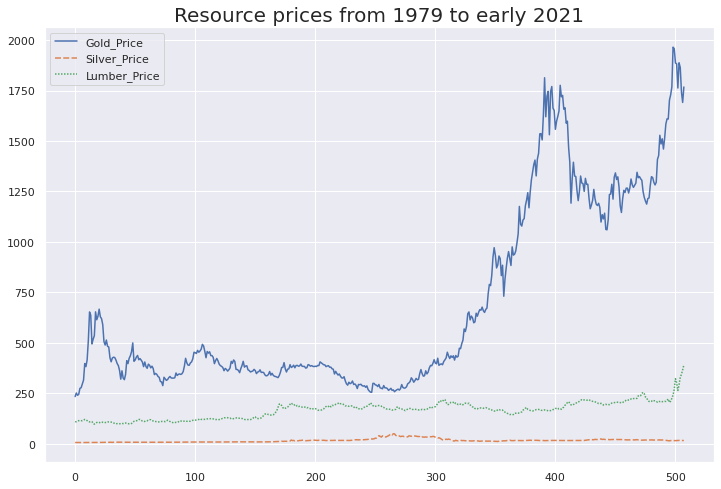

In [13]:
# initial plot of the prices of each resource
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(data = gsl).set_title("Resource prices from 1979 to early 2021", size = 20)
plt.legend(loc='upper left')
plt.show()

At first glance, it seems like the price of gold is the one that has spiked more than silver or lumber. To better compare, I set up some calculations.

In [14]:
# calculate the difference in dollar value and then use that to
# calculate the percent difference between the precious metal and lumber
gsl['$ Diff Gold to Lumber'] = gsl.apply(lambda row: row['Gold_Price'] - row['Lumber_Price'], axis=1)
gsl['% Diff Gold to Lumber'] = gsl.apply(lambda row: row['$ Diff Gold to Lumber'] / (row['Gold_Price'] + row['Lumber_Price'] / 2), axis=1)
gsl['$ Diff Silver to Lumber'] = gsl.apply(lambda row: row['Silver_Price'] - row['Lumber_Price'], axis=1)
gsl['% Diff Silver to Lumber'] = gsl.apply(lambda row: row['$ Diff Silver to Lumber'] / (row['Silver_Price'] + row['Lumber_Price'] / 2), axis=1)
display(gsl)

,Date,Gold_Price,Silver_Price,Lumber_Price,$ Diff Gold to Lumber,% Diff Gold to Lumber,$ Diff Silver to Lumber,% Diff Silver to Lumber
0,1979-01-01,233.7,6.083,108.3,125.4,0.435644,-102.217,-1.697027
1,1979-02-01,251.3,5.989,109.4,141.9,0.463725,-103.411,-1.703950
2,1979-03-01,240.1,5.982,112.8,127.3,0.429342,-106.818,-1.712321
3,1979-04-01,245.3,5.984,114.3,131.0,0.433129,-108.316,-1.715652
4,1979-05-01,274.6,6.009,114.2,160.4,0.483569,-108.191,-1.714351
...,...,...,...,...,...,...,...,...
503,2020-12-01,1887.6,16.500,291.5,1596.1,0.784961,-275.000,-1.694915
504,2021-01-01,1863.8,16.208,329.9,1533.9,0.756081,-313.692,-1.731593
505,2021-02-01,1742.9,15.590,343.9,1399.0,0.730606,-328.310,-1.750613
506,2021-03-01,1691.1,15.500,365.8,1325.3,0.707204,-350.300,-1.765625


In [15]:
print("Average % difference of gold to lumber", round(gsl['% Diff Gold to Lumber'].mean()*100,5), "%")
print("Average % difference of silver to lumber", round(gsl['% Diff Silver to Lumber'].mean()*100,5), "%")

Average % difference of gold to lumber 58.96388 %
Average % difference of silver to lumber -153.39385 %


In [16]:
print("How much did the % difference gold to lumber change over the 42-year period? ", round((gsl['% Diff Gold to Lumber'][507] - gsl['% Diff Gold to Lumber'][0])*100,5), "%")
print("How much did the % difference silver to lumber change over the 42-year period? ", round((gsl['% Diff Silver to Lumber'][507] - gsl['% Diff Silver to Lumber'][0])*100,5), "%")

How much did the % difference gold to lumber change over the 42-year period?  26.60912 %
How much did the % difference silver to lumber change over the 42-year period?  -7.82757 %


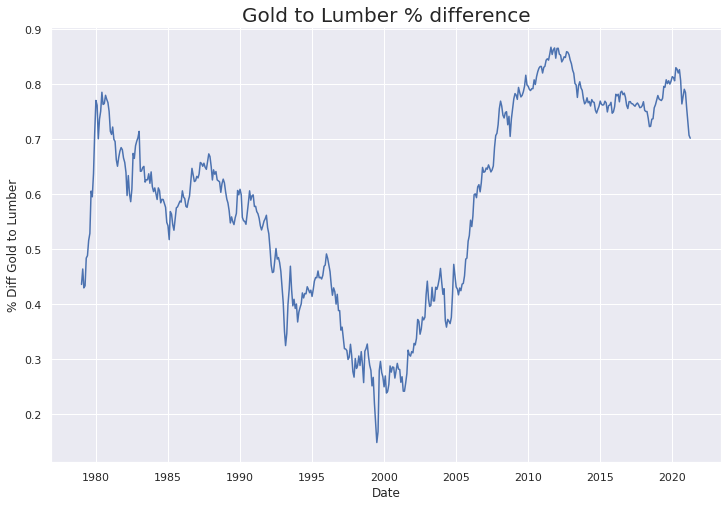

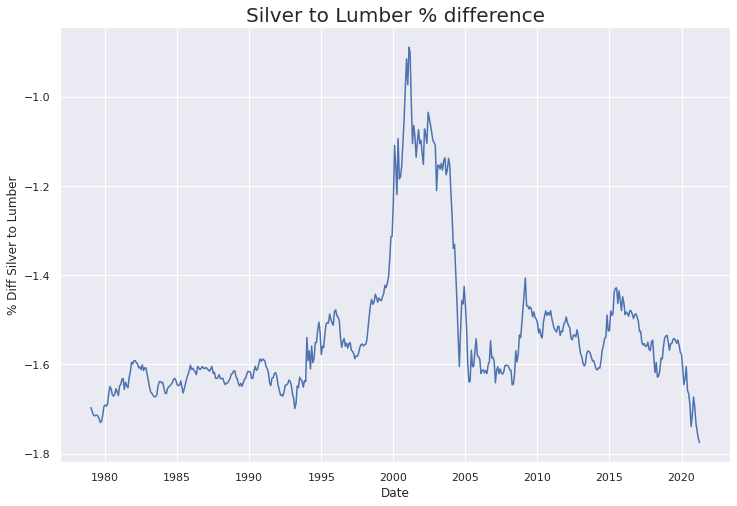

In [17]:
sns.lineplot(x = 'Date', y = '% Diff Gold to Lumber', data = gsl).set_title("Gold to Lumber % difference", size = 20)
sns.set(rc={'figure.figsize':(12,8)})
plt.show()
sns.lineplot(x = 'Date', y = '% Diff Silver to Lumber', data = gsl).set_title("Silver to Lumber % difference", size = 20)
sns.set(rc={'figure.figsize':(12,8)})
plt.show()

In [18]:
print("Over the course of this dataset the price of lumber (not accounting for inflation) rose $", gsl['Lumber_Price'][507] - gsl['Lumber_Price'][0])
oneyear = gsl['Lumber_Price'][507] - gsl['Lumber_Price'][495]
print("In the last year of data the price of lumber rose $", oneyear)
percent = (gsl['Lumber_Price'][495]/gsl['Lumber_Price'][507])*100
print("That is a", round(percent,3), "% increase in only 1 year!")

Over the course of this dataset the price of lumber (not accounting for inflation) rose $ 282.0
In the last year of data the price of lumber rose $ 185.8
That is a 52.396 % increase in only 1 year!


## Part 2: building a predictive model

Now that we've seen a comparison of the prices of gold to lumber and silver to lumber, I'll use an ARIMA model to predict the next 2 years of prices. To train the model, I'll use approximately 85% of the 42 year span, which is 430 rows or almost 36 years of data. Then I'll test the model on the remaining 15% of data, which is 78 rows or 6.5 years. Because this is a time series I will not be using a random sample to assign data to the training and test sets. The data needs to be sequential in time.

I tried other percentages of splitting the data such as 80/20, 90/10, and 67/33 but all resulted in worse or similar predictions to this set. I chose to use the 85/15 split because the price was on an upward trend prior to my cutoff for the training set and I hoped that would help the prediction.

In [19]:
# split the data into training and testing sets
train = gsl_regression[:431]
train.set_index(train['Date'], drop=True, inplace=True)
test = gsl_regression[431:]
test.set_index(test['Date'], drop=True, inplace=True)

In [20]:
display(train.head(2))
display(test.head(2))

,Date,Gold_Price,Silver_Price,Lumber_Price
Date,,,,
1979-01-01,1979-01-01,233.7,6.083,108.3
1979-02-01,1979-02-01,251.3,5.989,109.4


,Date,Gold_Price,Silver_Price,Lumber_Price
Date,,,,
2014-12-01,2014-12-01,1206.0,19.726,210.0
2015-01-01,2015-01-01,1260.3,19.780,210.0


I am choosing to use an ARIMA (Autoregressive Integrated Moving Average) model because it uses the moving average of the data. This is non-linear data and the ARIMA model will keep up with the shifts in the data mean with each new cycle.

In [21]:
# set up to train the model
import statsmodels as sm
from statsmodels.tsa.arima_model import ARIMA
import statistics
import math

In [22]:
# build the ARIMA model
model = ARIMA(train.Lumber_Price, order=(1,0,1)).fit(disp=-1) # .fit(transparams=False)?
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:           Lumber_Price   No. Observations:                  431
Model:                     ARMA(1, 1)   Log Likelihood               -1154.269
Method:                       css-mle   S.D. of innovations              3.502
Date:                Wed, 08 Dec 2021   AIC                           2316.538
Time:                        15:29:15   BIC                           2332.803
Sample:                    01-01-1979   HQIC                          2322.960
                         - 11-01-2014                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                157.2035     24.307      6.467      0.000     109.562     204.845
ar.L1.Lumber_Price     0.9925      0.006    175.114      0.000       0.981       1.004
ma.L1.Lumber_Price  

/usr/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


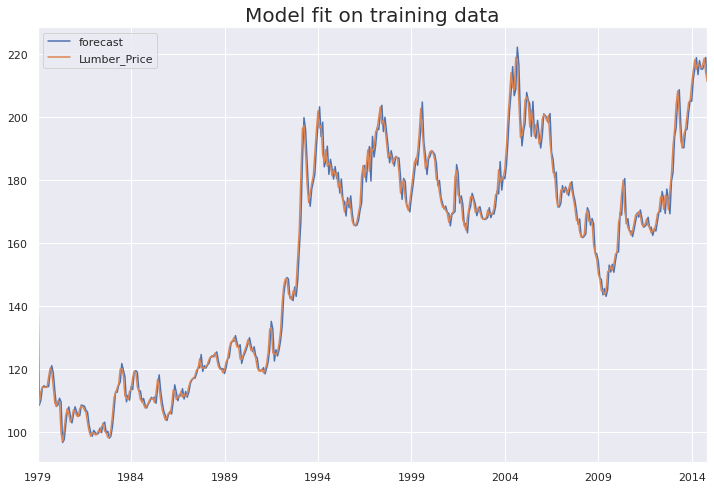

<Figure size 1200x800 with 0 Axes>

In [23]:
# Actual vs Fitted
model.plot_predict(dynamic=False)
plt.title("Model fit on training data", size = 20)
plt.legend(loc='upper left')
plt.figure(figsize=(12,8), dpi=100)
plt.show()

In [24]:
# test the model on the remaining 20% of the data, which is the remaining 102 rows.
test_date_early = min(test['Date'])
test_date_late = max(test['Date'])
print('Predicting from', test_date_early, 'to', test_date_late)
test_predictions, std_err, confidence = model.forecast(77, alpha=0.05)

# make the data a series for plotting
test_pred_series = pd.Series(test_predictions, index=test.index)

# Find the upper and lower boundaries of the prediction confidence
# note that the boundary will expand as time is farther from the
# training data by nature of predictions
lower_bound_series = pd.Series(confidence[:, 0], index=test.index)
upper_bound_series = pd.Series(confidence[:, 1], index=test.index)

Predicting from 2014-12-01 00:00:00 to 2021-04-01 00:00:00


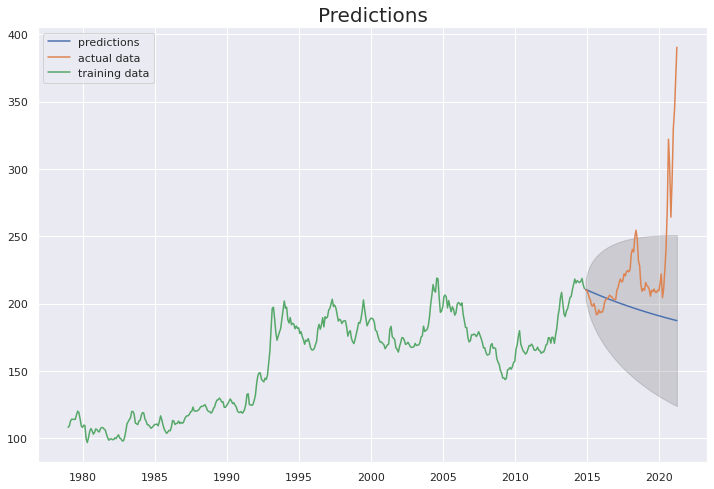

<Figure size 1200x800 with 0 Axes>

In [25]:
# Plot
plt.plot(test_pred_series, label='predictions')
plt.plot(test['Lumber_Price'], label='actual data')
plt.plot(train['Lumber_Price'], label='training data')
plt.fill_between(lower_bound_series.index, lower_bound_series, upper_bound_series, color='k', alpha=.15)
plt.title('Predictions', size=20)
plt.legend(loc='upper left')
plt.figure(figsize=(12,8), dpi=100)
plt.show()

The model was unable to predict the spike in price of lumber that happened in 2021. See calculations below to measure the quaity of this model.

In [26]:
# Calculate mean squared error as a measure of the model
errors = test['Lumber_Price'] - test_pred_series
squared_error = errors**2
rmse = math.sqrt(statistics.mean(squared_error))
print("Root Mean Squared Error (RMSE): ", round(rmse,3))
mae = statistics.mean(map(abs, errors))
print("Mean Absolute Error (MAE)", round(mae,3))

Root Mean Squared Error (RMSE):  51.56
Mean Absolute Error (MAE) 31.042


## Part 3: Looking into the future

What will the model do if I feed it all the data and use that do predict the next 4 years?

I'm going to rebuild the model using all the original data because the first model was unable to predict the spike in price for 2021. The reason for the spike was due to factors outside of control of the supply and demand of the lumber industry. Supply chain and labor shortages have affected and are still affecting many industries after the impact of the pandemic.

In [27]:
# prepare the data
gsl_regression.set_index(gsl_regression['Date'], drop=True, inplace=True)
# build the ARIMA model from ALL the data
model2 = ARIMA(gsl.Lumber_Price, order=(1,1,1)).fit(disp=-1) # .fit(transparams=False)?
print(model2.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.Lumber_Price   No. Observations:                  507
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1557.018
Method:                       css-mle   S.D. of innovations              5.216
Date:                Wed, 08 Dec 2021   AIC                           3122.035
Time:                        15:29:15   BIC                           3138.949
Sample:                             1   HQIC                          3128.668
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5662      0.330      1.718      0.086      -0.080       1.212
ar.L1.D.Lumber_Price    -0.1060      0.075     -1.422      0.155      -0.252       0.040
ma.L1.D.Lumb

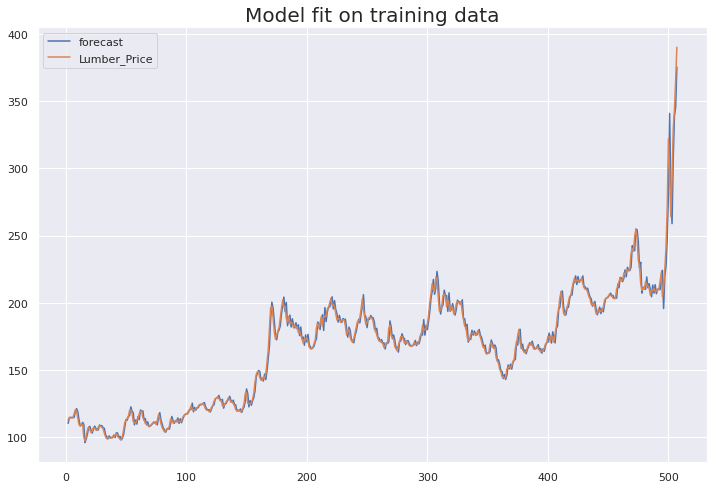

<Figure size 1200x800 with 0 Axes>

In [28]:
# Actual vs Fitted with ALL the data
model2.plot_predict(dynamic=False)
plt.title("Model fit on training data", size = 20)
plt.legend(loc='upper left')
plt.figure(figsize=(12,8), dpi=100)
plt.show()

In [29]:
# create a list of dates to index the forecast
future_dates = pd.date_range(start='2021-05-01', end='2025-04-01')
future_dates = future_dates[future_dates.is_month_start]

# make the predictions
predictions, se, conf = model2.forecast(48, alpha=0.05)

# make the data a series for plotting
pred_series = pd.Series(predictions, index=future_dates)

# Find the upper and lower boundaries of the prediction confidence
# note that the boundary will expand as time is farther from the
# training data by nature of predictions
lower_bnd_series = pd.Series(conf[:, 0], index=future_dates)
upper_bnd_series = pd.Series(conf[:, 1], index=future_dates)

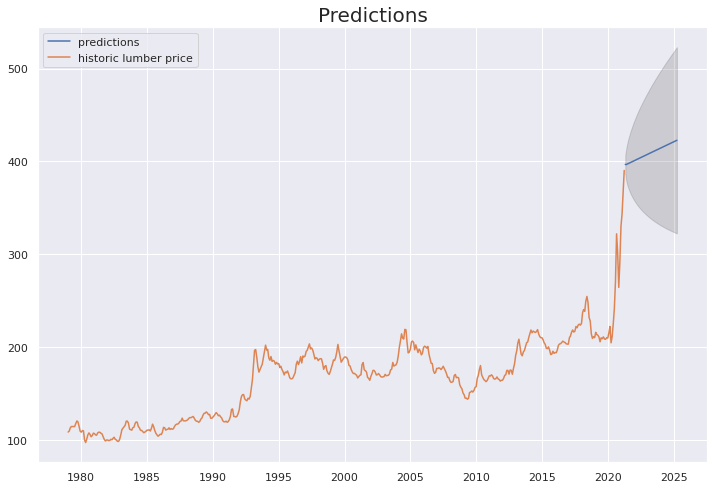

<Figure size 1200x800 with 0 Axes>

In [30]:
# Plot
#plt.figure(figsize=(8,5), dpi=100)
plt.plot(pred_series, label='predictions')
plt.plot(gsl_regression['Lumber_Price'], label='historic lumber price')
plt.fill_between(lower_bnd_series.index, lower_bnd_series, upper_bnd_series, color='k', alpha=.15)
plt.title('Predictions', size=20)
plt.legend(loc='upper left')
plt.figure(figsize=(12,8), dpi=100)
plt.show()

The model predicts that the price of lumber is likely to continue to rise over the next 4 years and is unlikely to fall to the prices pre-pandemic.

## Conclusion

The price of lumber certainly spiked in 2021 an extreme amount. However, it seems less concerning than the huge price increase of gold. It was interesting that the price of silver stayed nearly steady compared to either gold or lumber. Maybe there are other factors contributing to the increase in gold price such as the demand for computer components increasing sharply for the last 20 years. One could also explore how the lumber prices willl affect new home prices and availability for the next few years.